,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


next we subset the data, to keep three columns only


,alcohol,malic_acid,target
0,14.23,1.71,0
1,13.20,1.78,0
2,13.16,2.36,0
3,14.37,1.95,0
4,13.24,2.59,0


next we calculate the mean alchol content for each target class


target
0    13.744746
1    12.278732
2    13.153750
Name: alcohol, dtype: float64

we want names instead of numbers for the target classes


,alcohol,malic_acid,target,target_name
0,14.23,1.71,0,Pinot Noir
1,13.20,1.78,0,Pinot Noir
2,13.16,2.36,0,Pinot Noir
3,14.37,1.95,0,Pinot Noir
4,13.24,2.59,0,Pinot Noir


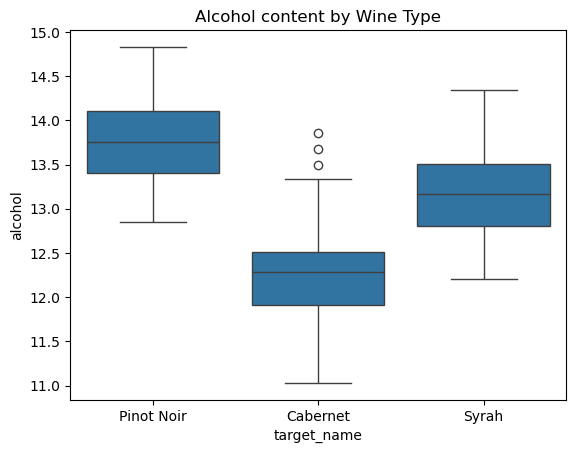

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine


data = load_wine() 
df = pd.DataFrame(data.data, columns=data.feature_names)
display(df.head())
df['target'] = data.target

print('next we subset the data, to keep three columns only')
df = df[['alcohol', 'malic_acid', 'target']]
display(df.head())


print('next we calculate the mean alchol content for each target class')
mean_alcohol = df.groupby('target')['alcohol'].mean()
display(mean_alcohol)

print('we want names instead of numbers for the target classes')

target_names = {0: 'Pinot Noir', 1:'Cabernet', 2:'Syrah'}
dic_target_names = pd.DataFrame.from_dict(target_names, orient='index', columns=['target_name'])

df_with_names = df.merge(dic_target_names, left_on='target', right_index=True)
display(df_with_names.head())

sns.boxplot(x='target_name', y='alcohol', data=df_with_names)
plt.title('Alcohol content by Wine Type')
plt.show()